In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Dataset_w6.xlsx')
df

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0
...,...,...,...,...,...,...,...
191,Venezuela (Bolivarian Republic of),SouthAmerica,912050.0,31977.0,11068.9,118.0,16324.0
192,Viet Nam,South-easternAsia,330967.0,95541.0,2067.9,136.0,174111.0
193,Yemen,WesternAsia,527968.0,28250.0,1106.4,136.0,6861.0
194,Zambia,EasternAfrica,752612.0,17094.0,1311.1,179.0,7442.0


### 1. Find out how many countries are there in the dataset.

Answer - 196

In [3]:
country_count = df['country'].nunique()
country_count

196

### 2. Find out how many countries with respect to the region are available in the dataset

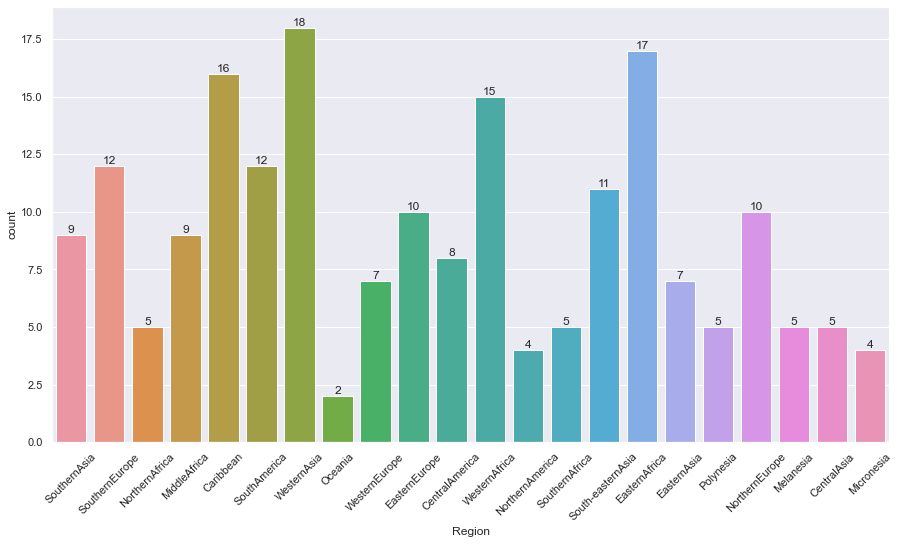

In [4]:
sns.set(rc = {'figure.figsize':(15,8)})
country_region = sns.countplot(data = df, x = 'Region')
for each in country_region.containers:
    country_region.bar_label(each)
    plt.xticks(rotation=45)

### 3. On average which region has the highest

a. GDP per capita (current US$) - **Northern America**

b. International trade: Imports (million US$) - **North America**

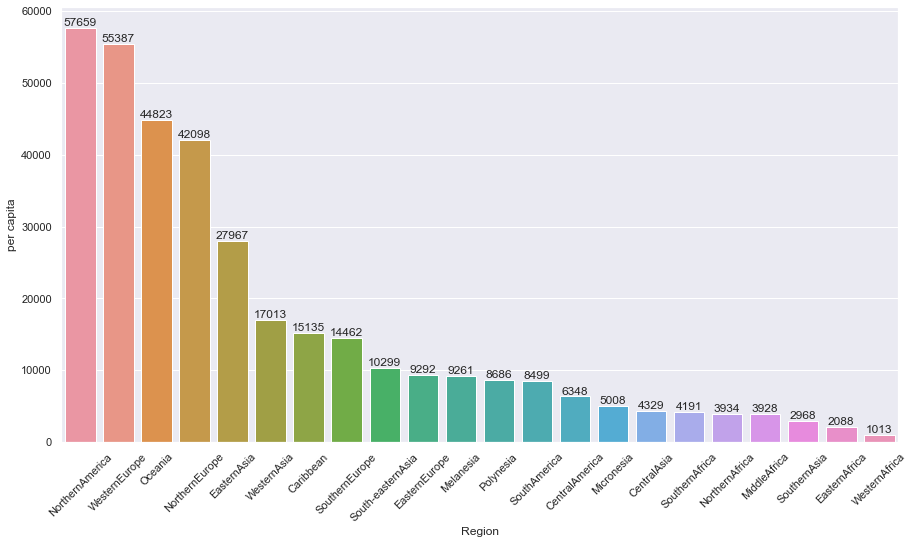

In [5]:
per_capita_region = list()
regions = df['Region'].unique()
regions = regions.tolist()
for region in regions:
    reg = df.loc[df['Region'] == region]
    reg_sum = reg['GDP per capita (current US$)'].mean()
    per_capita_region.append(int(reg_sum))

regions_df = pd.DataFrame({'Region': regions})
per_capita_df = pd.DataFrame({'per capita': per_capita_region})
req_df = pd.concat([regions_df, per_capita_df],axis = 1, join = 'inner')
req_df_capita = req_df.sort_values('per capita', ascending = False)

req_df_plot = sns.barplot(data = req_df_capita, x = 'Region', y = 'per capita')
for bar in req_df_plot.containers:
    req_df_plot.bar_label(bar)
    plt.xticks(rotation = 45)

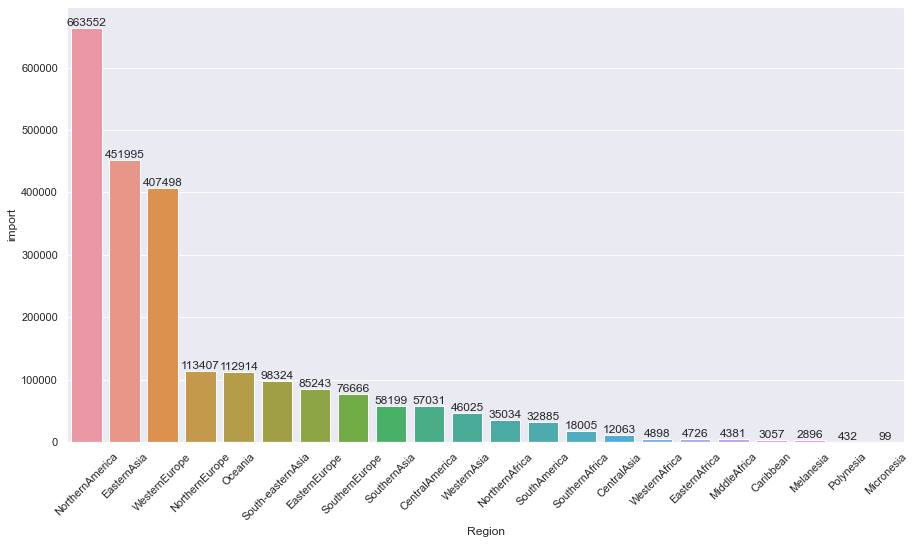

In [6]:
import_per_region = list()
regions = df['Region'].unique()
regions = regions.tolist()
for region in regions:
    reg = df.loc[df['Region'] == region]
    reg_sum = reg['International trade: Imports (million US$)'].mean()
    import_per_region.append(int(reg_sum))

regions_df = pd.DataFrame({'Region': regions})
import_df = pd.DataFrame({'import': import_per_region})
req_df = pd.concat([regions_df, import_df],axis = 1, join = 'inner')
req_df_import = req_df.sort_values('import', ascending = False)

req_df_plot = sns.barplot(data = req_df_import, x = 'Region', y = 'import')
for bar in req_df_plot.containers:
    req_df_plot.bar_label(bar)
    plt.xticks(rotation = 45)

### 4. Find out which region has more consistent with respect to GDP per capita  (current US)

ANS - **Western Africa** (Smaller standard dev means more consistent data points)

In [7]:
std_dev = list()
for each in regions:
    each_df = df.loc[df['Region'] == each]
    each_df = each_df['GDP per capita (current US$)']
    stnd = each_df.std()
    std_dev.append(stnd)

std_dev_df = pd.DataFrame({'STD DEV' : std_dev})

req_df = pd.concat([regions_df, std_dev_df], axis = 1, join = 'inner')
req_df.sort_values('STD DEV', ascending = True)

,Region,STD DEV
11,WesternAfrica,815.095399
2,NorthernAfrica,974.706575
13,SouthernAfrica,2177.551120
0,SouthernAsia,2855.708179
15,EasternAfrica,3716.131770
20,CentralAsia,4152.215490
10,CentralAmerica,4180.440883
5,SouthAmerica,4273.707394
21,Micronesia,4820.669694
3,MiddleAfrica,5274.846281


<AxesSubplot:xlabel='Region'>

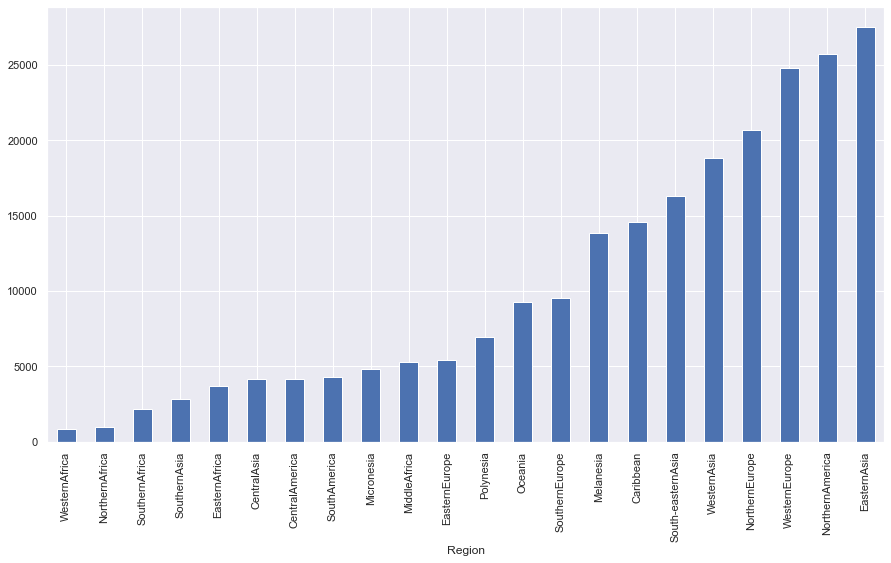

In [8]:
data = df.groupby('Region')['GDP per capita (current US$)'].std().sort_values().plot(kind = 'bar')
data